<a href="https://colab.research.google.com/github/tspacel/sta141bfinal/blob/main/Final_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.1 API request from NCBI database 
The NCBI Datasets v2 REST API is a web service provided by the National Center for Biotechnology Information (NCBI) that allows users to programmatically access and retrieve biological data from various NCBI databases.

This API provides a streamlined, consistent, and programmatic access to several NCBI datasets including nucleotide, protein, and genome sequences, as well as gene, variation, and taxonomy data. It also allows users to perform searches, retrieve metadata, download sequence data, and more.

The NCBI Datasets v2 REST API is based on Representational State Transfer (REST) principles, which means that it uses HTTP requests to access and interact with the data. It returns responses in JSON format, which can be easily parsed and processed by a wide range of programming languages and tools

In this project, we use `NSDPY`,`certifi`,`idna`,`chardet`,`request`,`urllib3` to request different package from the NCBI database, where:<br>
`NSDPY`: A python package to download DNA sequences from NCBI<br>
`Certifi`: provides Mozilla’s carefully curated collection of Root Certificates for validating the trustworthiness of SSL certificates while verifying the identity of TLS hosts. It has been extracted from the Requests project.<br>
`idna`:provides support for Internationalized Domain Names in Applications (IDNA). IDNA is a standard that allows domain names to contain non-ASCII characters. the `idan` package also provides two main functions: encode() and decode(). The encode() function converts a Unicode string containing non-ASCII characters to its Punycode representation.<br>
`chardet`:library used to automatically detect the character encoding of a given text. <br>
`request`: No need to introduce, since it is our old friend <br>
The `requests` package in Python is a popular library used for making HTTP requests and working with APIs. It provides an easy-to-use and intuitive interface for making HTTP requests to retrieve web content, such as HTML pages, JSON data, or image files.<br>
`urllib3` :Designed to be a robust and secure library for making HTTP requests in Python, and is often used as an alternative to the built-in `urllib` and `urllib2` libraries. It includes support for several HTTP features, such as SSL/TLS encryption, proxy support, and automatic decompression of compressed response content.

Which can be install to the colab by `pip install`
>! pip install NSDPY<br>
>! pip install certifi <br>
>! pip install idna <br>
>! pip install chardet <br>
>! pip install requests <br>
>! pip install urllib3 <br>

Form the NCBI we can get access to different type of file that unique for biological research, which are:<br>

genomic:`.fna` (genomic sequences in FASTA format)<br>
cds:`.fna` (nucleotide coding sequences in FASTA format)<br>
protein:`.faa` (protein sequences in FASTA format)<br>
annotation_report:`.jsonl` (annotation report in JSON Lines format)<br>
biosample_report:`.jsonl` (biosample report in JSON Lines format)<br>


Where the FASTA format is a commonly used format for representing nucleotide or protein sequences in bioinformatics. The format was developed in the early 1980s by William R. Pearson, and has since become a standard for exchanging sequence data between researchers.

A typical FASTA file consists of one or more sequences, each of which is identified by a header line that begins with the symbol ">". The header line includes a brief description of the sequence, such as the name of the organism, the gene name, or the protein function. The sequence itself follows the header line, and consists of a string of letters representing the nucleotide or protein sequence. 

In this project amining at finding all the protein from the rab GTPase family protein and look for their relationship and consevation<br>
The data :<br>
>RABA1e = SeqIO.read("/content/RABA1e.faa", "fasta")<br>
>RABA1 = SeqIO.read("/content/Raba1.faa", "fasta")<br>
>RABA1h = SeqIO.read("/content/Raba1h.faa", "fasta")<br>
>RABA5c = SeqIO.read("/content/Raba5c.faa", "fasta")<br>

That will return:<br>
>NP_193578.1<br>
>MGAYRADDDYDYLFKLVLIGDSGVGKSNLLSRFTRNEFSIESKSTIGVEFATRSVHVDEKIIKAQLWDTAGQERYRAITSAYYRGAVGALLVYDITRHITFENVERWLKELRDHTDANVVIMLVGNKADLRHLRAVPTEEARSFSERENMFFMETSALDATNVEQAFTHVLTQIYRVMSRKALDGTGDPMSLPKGQTIDIGNKDDVTAVKSSGCCSG<br>
>XP_001328031.1<br>
>MESSSTFKFIIIGSSGVGKTALLRRLVENKFVHDQQSTIGVEFDSTSIEVDDQVVKLQIWDTAGQERFRSIAKAYFRNAVGVVLVFDVTERRTFDDVNMWLNDVHSLCDPSARVILVGNKTDLADSRVIPVSEAEAYANHRKLAYIETSARAGDNVKAVFTKLATEVYRSSAKDPSVNPKSITATGSTTEKSGCC<br>
>XP_002881315.1<br>
>MGTYKAEDDYDYLFKVVLTGDSGVGKSNLLSRFTRNDFSHDSRSTIGVEFATRSIQVDDKIVKAQIWDTAGQERYRAITSAYYRGAVGALLVYDVTRHVTFENVERWLKELRDHTDANTVIMLVGNKADLNHLRAISTEEVKDFAERENTFFMETSALEAINVENAFTEVLTQIYRVVSKKALDAGDDPTTALPKGQMINVGSRDDVSAVKKSGCCAT<br>
>XP_020675035.1<br>
MDEENGEEYLFKVVIIGDSAVGKSNLLSRYARNEFNINTKATIGVEFQTQSLEIDGREVKAQIWDTAGQERFRAVTSAYYRGAVGALVVYDISRSSTFESVQRWLQELNTHSDTTIAKMLVGNKCDLEDIRAVSVEEGKSLAEAEGLFFIETSALDSTNVKAAFEIVIKEIYNNISRKSLNSDSYKGELSLNRVTLESNGTDGSKQGSSKFTCC<br>

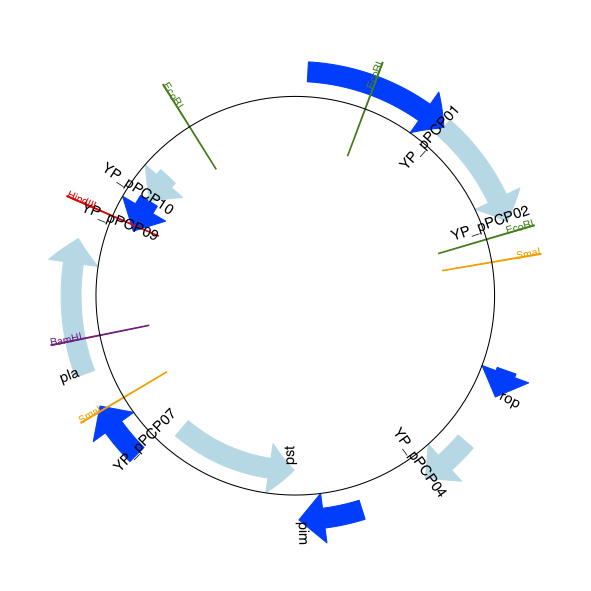

## 1.2 Data clean
Not all the package we use can read directly from the FASTA file, we are expected to transform the protein sequence about in to python list by `Biopython`:

Data cleaning of a FASTA file can involve various tasks such as removing duplicates, removing invalid characters, removing unnecessary whitespaces, and fixing header formatting. Here's an example of how to perform some basic data cleaning tasks for a FASTA file in Python:

>for seq_record in SeqIO.parse('/content/RABA1e.faa', "fasta"):
  RABA1e_id=str(seq_record.id)
  print(RABA1e_id)
  RABA1e_seq=str(seq_record.seq)
  print(RABA1e_seq)
for seq_record in SeqIO.parse('/content/Raba1.faa', "fasta"):
  RABA1_id=str(seq_record.id)
  print(RABA1_id)
  RABA1_seq=str(seq_record.seq)
  print(RABA1_seq)
for seq_record in SeqIO.parse('/content/Raba1h.faa', "fasta"):
  RABA1h_id=str(seq_record.id)
  print(RABA1h_id)
  RABA1h_seq=str(seq_record.seq)
  print(RABA1h_seq)
for seq_record in SeqIO.parse('/content/Raba5c.faa', "fasta"):
  RABA5c_id=str(seq_record.id)
  print(RABA5c_id)
  RABA5c_seq=str(seq_record.seq)
  print(RABA5c_seq)

We then iterate over each line in the input file and perform the following cleaning steps:

Strip any leading or trailing whitespace from the line using the strip() method.
Check if the line is a header line by checking if it starts with the > symbol.
If the line is a header line, fix the formatting by removing any leading or trailing whitespace from the header using the strip() method, and write the cleaned header to the output file.
If the line is not a header line, remove any invalid characters from the sequence using a list comprehension that filters out any characters that are not A, C, G, T, or N. We then check if the sequence is unique by checking if it is already in the seen_sequences set, and if it is not, write the cleaned sequence to the output file and add it to the set of seen sequences.
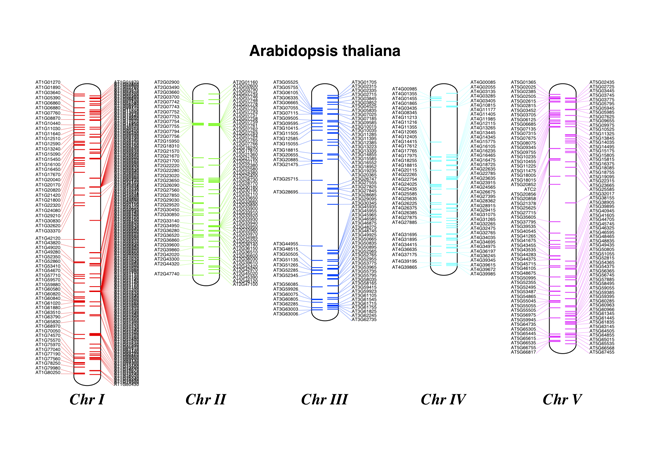


We are also input one of the sequencing result as `.ABI` format.
The .abi file format is a file format used for storing raw data generated by Sanger sequencing machines. Sanger sequencing is a widely used method for determining the nucleotide sequence of a DNA sample. It involves the use of fluorescent dyes to label the DNA fragments and a capillary electrophoresis system to separate the fragments based on their size.

The .abi file format was developed by Applied Biosystems (now part of Thermo Fisher Scientific) for use with their automated DNA sequencers. The format contains information about the raw data generated by the sequencer, including the sequence trace data and information about the base calling and quality scores.

The .abi format is binary and proprietary, which means that it can only be read by specialized software tools provided by Applied Biosystems. However, there are several open-source tools available for converting .abi files to more widely used formats such as FASTA or FASTQ, which can be used for downstream analysis and interpretation.

where we can point the result as absortbance of differe track:
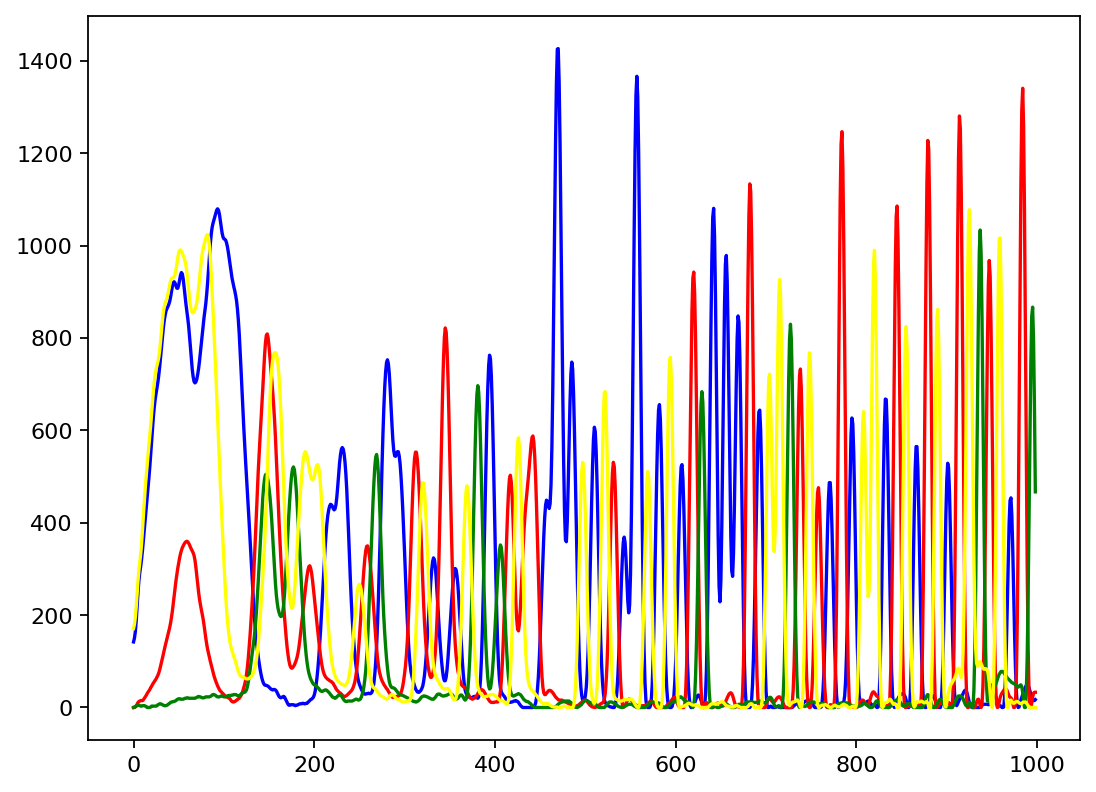

## 2.1 Mutiple genes alignement
Similar to the natural language, the inheritance information of living organism is written in the DNA in the format of nucleic acid base pair. And this information could be translated into protein and control the biological metabolism. Although people cannot translate the DNA information into natural language, but there are certain ‘Grammar’ within the DNA information, which could be presented in the form of homology and conservation.
Gene alignment is similar to natural language processing, we can do multiple comparison between different DNA file and conclude difference and  similarity between them. By doing this we can provide insight into the functional importance of certain sequences, and visualize our finding in the form of images.

Multiple Sequence Alignment (MSA) is a computational method used to align three or more biological sequences (e.g., DNA, RNA, or protein sequences) in order to identify regions of similarity or conservation. The goal of MSA is to arrange the sequences in a way that maximizes the number of matches and minimizes the number of mismatches or gaps.

MSA is an important tool for understanding the evolution and function of biological sequences. It can reveal conserved motifs and domains that are critical for the structure and function of proteins, for example. It is also used for comparative genomics, where multiple sequences from different species are aligned to identify evolutionary changes and relationships between different organisms

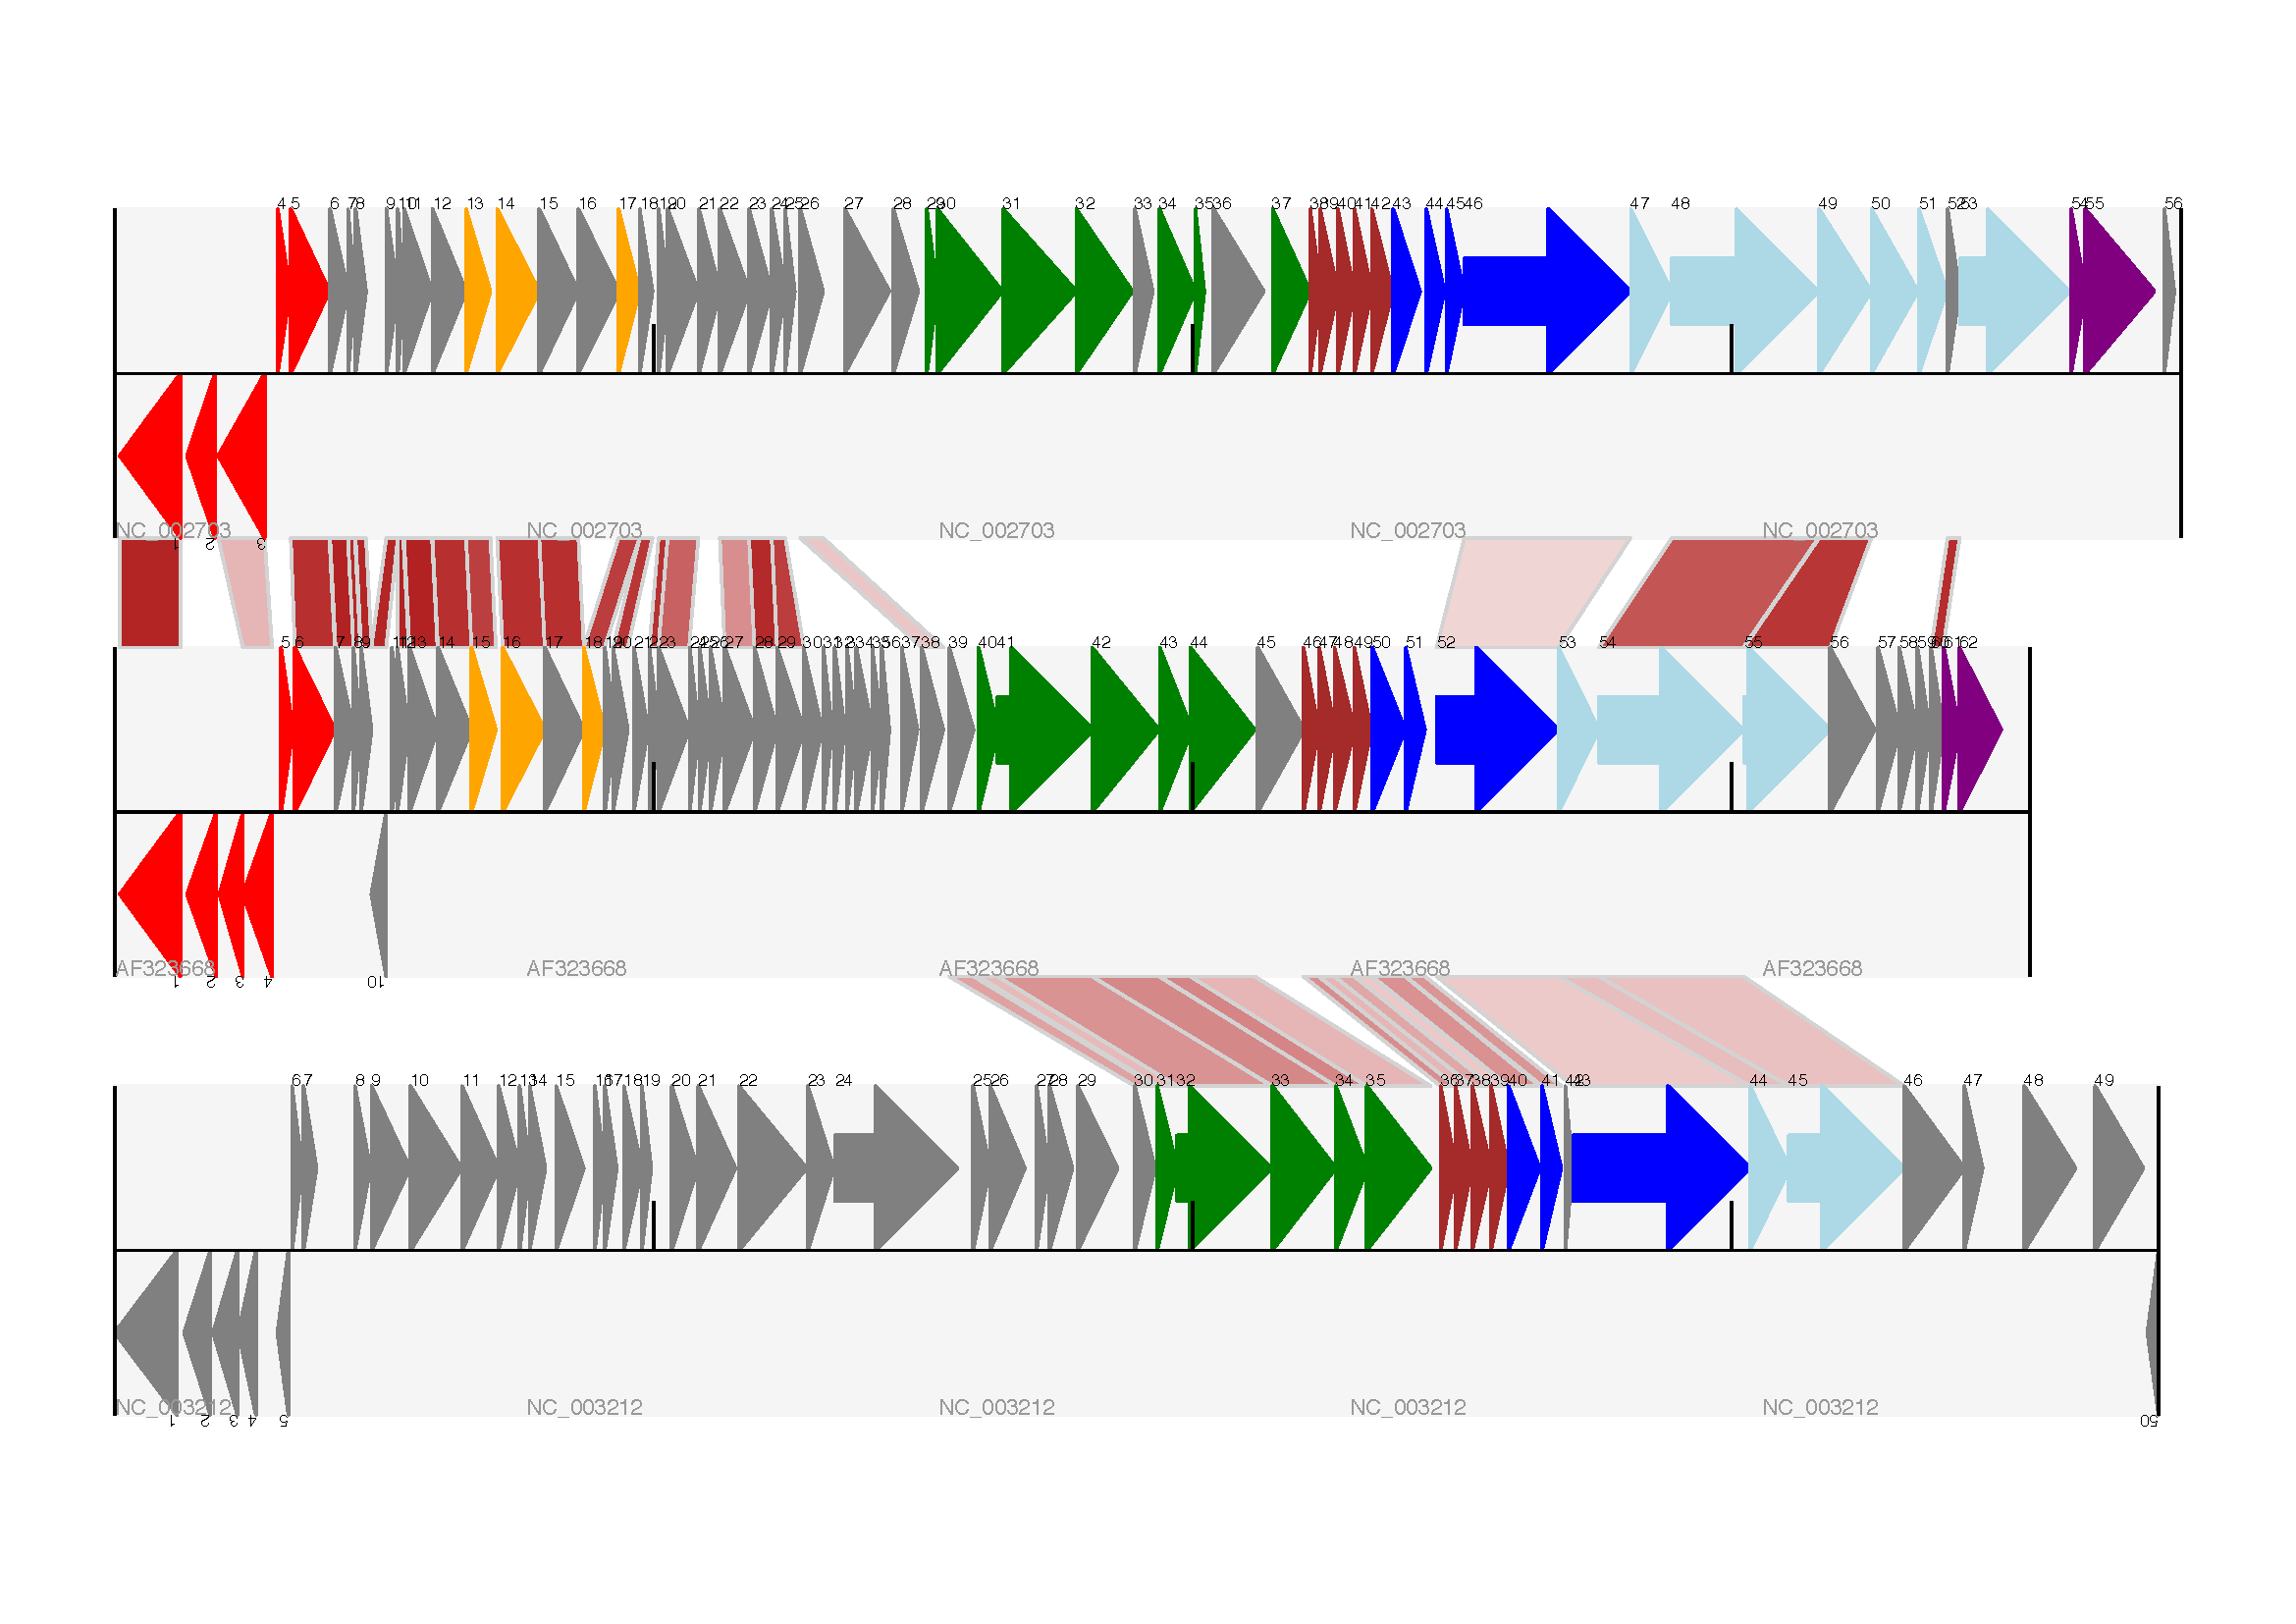

Multiple sequence alignment is a fundamental task in bioinformatics that involves comparing and aligning multiple sequences of DNA, RNA, or protein molecules. The aim of multiple sequence alignment is to identify regions of conservation and variation between different sequences, which can be used to infer evolutionary relationships and functional annotations. Python, with the help of various packages and modules, provides a flexible and powerful platform for performing multiple gene alignment.

There are several packages available in Python for performing multiple sequence alignment, including Biopython, MUSCLE, and Clustal Omega. Biopython is a widely used package that provides a comprehensive set of modules and tools for performing various bioinformatics tasks. The SeqIO module in Biopython can be used for reading and writing sequence data in various formats, while the pairwise2 module can be used for pairwise sequence alignment. The AlignIO module provides functions for handling multiple sequence alignment data. MUSCLE and Clustal Omega are standalone command-line tools that can be integrated with Python using subprocess or os.system functions.


>uids = [
    RABA1e_id, RABA1_id, RABA1h_id, RABA5c_id
]

    for i in range(len(sequences)):
        for j in range(i):
           # Align sequences pairwise
           alignment = align.align_optimal(
               sequences[i], sequences[j], substitution_matrix
            )[0]
           # Calculate pairwise sequence identities and fill matrix
            identity = align.get_sequence_identity(alignment)
            identities[i,j] = identity
            identities[j,i] = identity

Which generate the identity matrix:
>       [1.         0.40930233 0.78899083 0.53456221]
       [0.40930233 1.         0.43981481 0.42056075]
       [0.78899083 0.43981481 1.         0.51834862]
       [0.53456221 0.42056075 0.51834862 1.        ]]

## Conclusion

We found less density region near the chromosome centromere, which may indicate the biological function of centromere in the gene expression regulation
We recover conserve region between Arabidopsis Chromosome 1 and 4, which indicates a chromosomal duplication event happened in the ancestor of Arabidopsis.
The alignment shows the similarity of conserved gene and region, which indicate the potential function of the conserved region.


1.   We found less density region near the chromosome centromere, which may indicate the biological function of centromere in the gene expression regulation
2.   We recover conserve region between Arabidopsis Chromosome 1 and 4, which indicates a chromosomal duplication event happened in the ancestor of Arabidopsis.
3.   The alignment shows the similarity of conserved gene and region, which indicate the potential function of the conserved region.
4.   We align one know sequece with the know gene, and we are recover the unknow sequence data is from one of the Arabidosis gene also in the RAB familty

## Acknowledgement

Especially thanks for Dr. Bo-Ning and Hongyuan Wang and other TAs for help and expertise.
Many thanks for the Dr.Bo-Liu and Dr.Dandekar who providing the sequence data and expertise in both biological concepts and Biopython coding.




## Source Code

#Introduction

In [ ]:
def solution(n):
  def fib():
    last = (0, 1)
    while True:
      print(last, 0)
      yield last[0]
      print(last, 1)
      last = last[0] + last[1], last[0]
      print(last, 2)

  gen = fib()
  return [next(gen) for _ in range(n)]

solution(5)

(0, 1) 0
(0, 1) 1
(1, 0) 2
(1, 0) 0
(1, 0) 1
(1, 1) 2
(1, 1) 0
(1, 1) 1
(2, 1) 2
(2, 1) 0
(2, 1) 1
(3, 2) 2
(3, 2) 0


[0, 1, 1, 2, 3]

**nsdpy** is designed to download, filter and classify big batch of sequences from **NCBI**. nsdpy stqands for NCBI Sequence Downloader.

To do so, enter your own parameters in the code cell from the *Parameters* section.

Then you can click *Run all* on the *Runtime* menu or run the cells manually. After entering the query and selecting the options you want to use you can go to runtime > 'run all'.

You can save a copy of this notebook (file > save a copy ...) to modify to code according to your needs.

Once the cells have finished running you can check the report of the search in the ouput of the *main* subsection code cell.  
You'll find the donwloaded files on the right side in the *files* section. Open the folders to see and download the files you need.


###Google drive

Run the following code cell if you wish the results to be downloaded as an archive directly in your *google drive*.
Otherwise the results will be saved in *files* section of the runtime (on the left of your screen, the little folder symbol).

If you don't want the results to be saved directly to your google drive you can delete this cell or just run all the other cells manualy as this cell only needs to be run if you wish the results to be sent to your *google drive*.


Note that the runtime a *google colab* is available for 12 hours maximum, after this time the files saved in the *files* section will be deleted.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
googledrive = 1

Mounted at /content/drive


##Parameters


Change the value of the parameters in the following code cell to enter your own parameters. 
Read the comments in green to know what the parameters correspond to and how to  use them.

In [ ]:
from pickle import TRUE
###Enter your request to NCBI wrapped in quotes
##example:"COX1[Title]"

request = 'COX1[Title] AND Mus musculus[ORGN]'


###if you wish to provide an Api key enter your API key inside the single quotes
#otherwise leave it like this

apikey = '6e91886e1c85bd23416dbc931692ffa09508'


###if you want the resluts to be classified on particular taxonomic levels:
# 1 for kingdoms, 
# 0 for phylums, 
# "s" for species, 
#or a list of the levels you wish, for example: ["Deuterostomia", "Protostomia"]

classif = 3


### True if you want to download the fasta files containing the coding sequences

cds = True


####If you want this option to work you need to use the above cds option as well (True)
###Enter the name of the gene you want to filter, you can use regular expression
##example: ["COX1", "CO[1I]"] the search is case insensitive

filter = [] 


### True if you want a to get a text file with the accession version numbers
#and their corresponding TaxIDs, if not leave "".

taxids = True


### True if you want to have the results written in Tab-separated value format (.tsv)

tsv = False


### True if you want the taxonomic information added to the information line

information = False


### enter the file path(s) if you want to add some taxa names from one or more
#text file as follow: ['path/to/file', 'path/to/file2']

taxa_lists = []


### True is you want more output comments 

verbose = False


### True if you want no output comments

quiet = False



Once you entered your parameters you can just go to the *Runtime* menu and click *Run all*.

Note that if you haven't run or deleted the *Google drive* cell before the notebook will wait for you ton enter the confirmation code required to mount your *google drive* to the notebook.

###functions

In [ ]:
import requests             #https://requests.readthedocs.io/en/master/
import os
import re
import csv
from collections import Counter


def download(parameters, address):
    ##send requests to the API until getting a result
    connect = 0
    while True:
        try:
            result = requests.get(address, params = parameters, timeout = 60)
            break
        except requests.exceptions.HTTPError as errh:
            print("Http Error:", errh)
            return(1)

        except requests.exceptions.Timeout as to:
            print(f'Connection Timed out\n{to}')
            continue

        except requests.exceptions.ConnectionError as _:
            if connect == 1:
                continue
            elif connect == 0:
                connect = 1
                print(f'Connection error (please reconnect)\n ')
                continue

        except requests.exceptions.RequestException as e:
            print(f'An exception occurred:\n{e}')
            continue

    return result


def esearchquery(QUERY):
    ##unpack QUERY:
    (query, api_key) = QUERY

    ##build api address
    esearchaddress = 'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi'
    #parameters
    parameters = {}
    if api_key:
        parameters["api_key"] = str(api_key)
    parameters["db"] = "nucleotide"
    parameters["idtype"] = "acc"
    parameters["retmode"] = "json"
    parameters["retmax"] = "0"
    parameters["usehistory"] = "y"    
    #user's query
    parameters["term"] = query
    
    ###send request to the API
    y = download(parameters, esearchaddress)
    if y == 1:
        return ({"error": "wrong address for esearch"})  
    return (y.json())


def taxids(params, path, OPTIONS=None):

    if OPTIONS is None:
        OPTIONS = ("","","","","","")

    ##unpack parameters
    (querykey, webenv, count) = params
    (verb, _, _, fileoutput, _, _) = OPTIONS

    ##retreive the taxids sending batches of accession numbers to esummary
    retmax = 100
    dict_ids = {}
    taxid = ''
    seqnb = ''

    if count % retmax == 0:
        nb = count//retmax
    else: 
        nb = (count//retmax) + 1
    for x in range(nb):
        ##build the API address
        esummaryaddress = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esummary.fcgi"
        #parameters 
        parameters = {}
        parameters['db'] = "taxonomy"
        parameters['query_key'] = querykey
        parameters['WebEnv'] = webenv
        parameters['retstart'] = str(x * retmax)
        parameters['retmax'] = str(retmax)
        parameters['rettype'] = "uilist"
        parameters['retmode'] = "text"
        result = download(parameters, esummaryaddress)

        #comments
        if verb and verb > 1:
            ret = parameters['retstart']
            print(f'{round(((int(ret) + 100)/count)*100, 1)} %  of the TaxIDs downloaded')

        ###extract the TaxIDs and accession numbers (record in text file and in dict_ids)
        f = result.text.splitlines()
        for line in f:
            if len(line.split('<DocSum>')) > 1:
                taxid = ''
                seqnb = ''
            else:
                try:
                    version = line.split('<Item Name="AccessionVersion" Type="String">', 1)[1]
                    seqnb = version.split("<")[0].strip()
                except IndexError:
                    pass

                TaxId = line.split('<Item Name="TaxId" Type="Integer">', 1)
                if len(TaxId) > 1:
                    taxid = TaxId[1].split("<")[0].strip()
                
                if seqnb:
                    dict_ids[seqnb] = taxid 

    if fileoutput:
        ##filename
        filename = "TaxIDs.txt"
        ##path to filename
        path = path + "/" + filename
        with open(path, 'a') as summary:
            [summary.write(f'{key}  {value}\n') for key, value in dict_ids.items()]

    return dict_ids


def dispatch(lineage, classif):
    ###Phylums
    Plantae = ['Chlorophyta', 'Charophyta', 'Bryophyta', 'Marchantiophyta', 'Lycopodiophyta', 'Ophioglossophyta', 'Pteridophyta',\
    'Cycadophyta', 'Ginkgophyta', 'Gnetophyta', 'Pinophyta', 'Magnoliophyta', 'Equisetidae', 'Psilophyta', 'Bacillariophyta',\
    'Cyanidiophyta', 'Glaucophyta', 'Prasinophyceae','Rhodophyta']
    Fungi = ['Chytridiomycota', 'Zygomycota', 'Ascomycota', 'Basidiomycota', 'Glomeromycota']
    Metazoa = ['Acanthocephala', 'Acoelomorpha', 'Annelida', 'Arthropoda', 'Brachiopoda', 'Ectoprocta', 'Bryozoa', 'Chaetognatha',\
    'Chordata', 'Cnidaria', 'Ctenophora', 'Cycliophora', 'Echinodermata', 'Echiura', 'Entoprocta', 'Gastrotricha', 'Gnathostomulida',\
    'Hemichordata', 'Kinorhyncha', 'Loricifera', 'Micrognathozoa', 'Mollusca', 'Nematoda', 'Nematomorpha', 'Nemertea', 'Onychophora'\
    'Orthonectida', 'Phoronida', 'Placozoa', 'Plathelminthes', 'Porifera', 'Priapulida', 'Rhombozoa', 'Rotifera', 'Sipuncula',\
    'Tardigrada', 'Xenoturbella']

    ##no option selected
    if classif == 3 or classif == 2:
        return "sequences"

    ##user gave a list of taxonomic levels
    if isinstance(classif, list):
        try:
            other = [rank for rank in lineage if rank in classif][0]
        except IndexError:
            other = "OTHERS"
        return other
    ##phylums
    if classif == 0:
        try:
            Phylum = [phy for phy in lineage if phy in Metazoa or phy in Fungi or phy in Plantae][0]
        except IndexError:
            Phylum = 'OTHERS'
        return Phylum
    ##kingdoms
    if classif == 1:
        if 'Metazoa' in lineage or len(list(set(lineage) & set(Metazoa))) > 0:
            kingdom = "METAZOA"
        elif "Viridiplantae" in lineage or len(list(set(lineage) & set(Plantae))) > 0:
            kingdom = "PLANTAE" 
        elif "Fungi" in  lineage or len(list(set(lineage) & set(Fungi))) > 0:
            kingdom = "FUNGI" 
        else:
            kingdom = "OTHERS"
        return kingdom
    ##if the users choose to make groupe n rank higher than species (classif >= 3)
    classif = -(int(classif) - 2)
    try:
        rank = lineage[classif]
    except IndexError:
        rank = "OTHERS"
    return rank


#query taxonomy with efetch, returns a dict with taxid as key and info in a dict as value
def completetaxo(idlist, QUERY, OPTIONS):

    ##unpack parameters
    (_, api_key) = QUERY
    (verb, _, classif, _, _, _) = OPTIONS

    if verb and verb > 0:
        print("retrieving taxonomy...")

    ##dictionnary that will be returned
    data = {}
    idlist = [i.split(".")[0] for i in idlist]
    ##retreive the taxonomy sending batches of TaxIds to efetch
    #number of TaxIds to be sent to the API at once
    retmax = 100
    count = len(idlist)
    if count % retmax == 0:                                    
        nb = count//retmax
    else: 
        nb = (count//retmax) + 1

    for x in range(nb):
        ##slice the idlist
        retstart = x * retmax
        idsublist = idlist[retstart:(retstart+retmax)]
        idsublist = ','.join(idsublist)

        ##build API address
        efetchaddress = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi"
        parameters = {}
        #parameters 
        parameters['db'] = "taxonomy"
        parameters['id'] = idsublist
        if api_key:
            parameters['api_key'] = api_key

        ##loop until download is correct
        result = download(parameters, efetchaddress)

        #comments
        if verb > 1:
            print(f'{round((int(retstart)/count)*100, 1)} % of the taxonomy found')

        ##analyse the results from efetch
        result = result.text.split('</Taxon>\n<Taxon>')

        for seq in result:
            dicttemp = {}
            try:
                TaxId, _ = seq.split('</TaxId>', 1)
                _, TaxId = TaxId.split('<TaxId>', 1)
                TaxId = TaxId.strip()    
            except ValueError:
                TaxId = 'not found'

            #check if the taxonomy for a given TaxId is already in memory
            if TaxId in data.keys():
                continue
            
            try:
                Name , _ = seq.split('</ScientificName>', 1)
                _, Name = Name.split('<ScientificName>', 1)   
            except ValueError:
                Name = 'not found'
            dicttemp['Name'] = Name

            try:
                Lineage , _ = seq.split('</Lineage>', 1)
                _, Lineage = Lineage.split('<Lineage>', 1)    
            except ValueError:
                Lineage = 'not found'
            lineage = Lineage.split('; ')
            dicttemp['Lineage'] = lineage

            ##dispatch
            dicttemp['dispatch'] = dispatch(lineage, classif)

            data[TaxId] = dicttemp

    #comments
    if verb and verb > 0:
        print(f'number of taxids:\t{len(data.keys())}')

    return data


## Download the CDS fasta files by batch of 'retmax' for the seq access found by an esearch request returning a querykey and a webenv variable
def cds_fasta(path, dict_ids, dict_taxo, QUERY, list_of_ids, OPTIONS=None):

    if OPTIONS is None:
        OPTIONS = ("","","","","","")
    
    ## Unpack parameters
    (_, api_key) = QUERY
    (verb, genelist, classif, _, tsv, information)= OPTIONS

    # Comment:
    if verb and verb > 0:
        print("Downloading the CDS fasta files...")

    # Number of accession numbers to be sent at each API query
    retmax = 200    
    # List of accession number for wich a gene is found or the file has been retrieve if no gene filter:
    found = []
    count = len(list_of_ids)

    if count % retmax == 0:
        nb = count//retmax
    else: 
        nb = (count//retmax) + 1

    for x in range(nb):
        ## Split the list of ids
        ids = list_of_ids[x * retmax : (x * retmax) + retmax]
        ## Check that id parameters is not empty
        ids = [i for i in ids if i]
        ## Build API address
        efetchaddress = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi"
        parameters = {}
        # Parameters 
        parameters['id'] = ",".join(ids)
        parameters['db'] = "nuccore"
        if api_key:
            parameters["api_key"] = api_key
        parameters['rettype'] = "fasta_cds_na"
        parameters['retmode'] = "text"

        ## Download
        raw_result = download(parameters, efetchaddress)
        raw_result = raw_result.text

        ## Extract available information
        if not information and not genelist and classif == 3:
            result_fasta = raw_result.split(">lcl|")[1:]
            sublist = [r.split("_cds")[0] for r in result_fasta]
  
        ##analyse the results     
        sublist = extract(path, raw_result, dict_ids, dict_taxo, OPTIONS, verb)

        found = found + sublist
        #comments
        if verb > 1:
            start = parameters['retmax']
            print(f'{round(((x * int(start) + 100)/count)*100, 1)} %  of the CDS fasta files downloaded')

    return found


def subextract(seq, path, dict_ids, dict_taxo, genelist, OPTIONS=None):

    if OPTIONS is None:
        OPTIONS = ("","","","","","")

    (_, _, classif, _, tsv, information) = OPTIONS


    ###find gene in a seq and write to ouput file
    ##extract accession number
    try:
        key = seq.split(">lcl|")[1].split("_cds")[0]
    except IndexError:
        return

    ##extract SeqID
    try: 
        SeqID = seq.split(">lcl|")[1].split(" [")[0]
    except IndexError:
        return

    ##build id_line (retrieve info)
    try:
        TaxId = dict_ids[key]
    except KeyError:
        return 

    ## Extract info
    #Lineage
    try:                                                       
        Lineage = dict_taxo[TaxId]['Lineage']
    except KeyError:
        Lineage = "no info"

    #Name
    try:
        Name = dict_taxo[TaxId]['Name']  
    except KeyError:
        Name = "no info"

    #dispatch
    try:
        dispatch = dict_taxo[TaxId]['dispatch']
    except KeyError:
        dispatch = "others"
    if classif == 3:
        dispatch = "sequences"

    ##check if genes
    check = [1 for reg_exp in genelist if len(re.split(reg_exp, seq, flags=re.IGNORECASE)) > 1]
    if 1 in check or not genelist:
        ##get the Sequence
        _, dna = seq.split('\n', 1)
        
        # if dict_taxo and information:
        if information:
            Lineage = ", ".join(Lineage)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
            info_line = Name + '-' + SeqID + ' | ' + TaxId + ' | ' + Lineage 
        else:
            info_line = seq.split('\n', 1)[0]

        # Make only one > and \n
        info_line = '>' + info_line.lstrip(">")
        info_line = info_line.rstrip("\n") + "\n"

        ## Create folders is tsv is selected
        if tsv:
            if not os.path.exists(path + "/fasta"):
                os.makedirs(path + "/fasta")
            if not os.path.exists(path + "/tsv"):
                os.makedirs(path + "/tsv")
            # Create paths
            fasta_file = path + "/fasta/" + dispatch + ".fasta"
            tsv_file = path + "/tsv/" + dispatch + ".tsv"
        else:
            fasta_file = path + "/" + dispatch + ".fasta"
            tsv_file = path + "/" + dispatch + ".tsv"

        # write fasta file
        with open(fasta_file, 'a') as new:
            new.write(str(info_line))
            new.write(str(dna).rstrip("\n") + "\n") 

        # write tsv file
        if tsv:
            # Format dna sequence 
            dna = "".join(dna.split("\n"))

            # write .tsv file
            data = (Name, SeqID, TaxId, Lineage, dna)
            tsv_file_writer(tsv_file, data, OPTIONS)

        return key

    else:
        return


def extract(path, text, dict_ids, dict_taxo, OPTIONS=None, verb=""):

    # unpack OPTIONS
    (verb, genelist, classif, _, tsv, information)= OPTIONS

    # Comments
    if verb and verb > 1:
        print('analyzing the results...')
    
    found = []

    # Extract genes to filter
    genelist = [ "=" + gene + "]" for gene in genelist]  

    seq = ''
    text = text.splitlines()

    if not text:
        return []

    for line in text:
        if len(line.split(">lcl|")) > 1:
            if seq:
                try:
                    result = subextract(seq, path, dict_ids, dict_taxo, genelist, OPTIONS)
                    if result:
                        found.append(result)
                except:
                    pass
            seq = str(line)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
        else:
            seq = seq + '\n' + line

    return found


def fasta(path, dict_ids, dict_taxo, QUERY, list_of_ids, OPTIONS=None):

    if OPTIONS is None:
        OPTIONS = ("","","","","","")
    
    ## Unpack parameters
    (_, api_key) = QUERY
    (verb, _, classif, _, tsv, information)= OPTIONS

    if verb and verb > 0:
        print("Downloading the fasta files...")

    retmax = 200    ## Number of sequences per request to the API
    keys = []
    count = len(list_of_ids)

    if count % retmax == 0:
        nb = count//retmax
    else: 
        nb = (count//retmax) + 1

    for x in range(nb):
        ## Split the list of ids
        ids = list_of_ids[x * retmax : (x * retmax) + retmax]
        ## Check that id parameters is not empty
        ids = [i for i in ids if i]
        ## Build API address
        efetchaddress = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi"
        parameters = {}
        # Parameters 
        parameters['db'] = "nuccore"
        parameters['id'] = ",".join(ids)
        if api_key:
            parameters["api_key"] = api_key
        parameters['rettype'] = "fasta"
        parameters['retmode'] = "text"

        ## Download
        raw_result = download(parameters, efetchaddress)
        raw_result = raw_result.text

        ## Extract available informations
        result = raw_result.split('>')

        ## Store analyzed Accession version numbers
        for seq in result:
            try:
                id_line, dna = seq.split('\n', 1)
            except ValueError:
                continue

            try:
                key = id_line.split()[0]
            except IndexError:
                continue
            
            #from dict_ids
            try:
                taxid = dict_ids[key]
            except KeyError:
                taxid = 'not found'
            
            # from dict_taxo
            try:
                lineage = dict_taxo[taxid]['Lineage']
                lineage = ", ".join(lineage)
            except KeyError:
                lineage = 'not found'
            
            try:
                name = dict_taxo[taxid]['Name']
            except KeyError:
                name = 'not found'
            
            try:
                dispatch = dict_taxo[taxid]['dispatch']
            except KeyError:
                name = 'others'
            
            if classif == 3:
                dispatch = "sequences"
            
            data = (name, key, taxid, lineage, dna)

            # Create folders for .tsv files and .fasta files
            if tsv:
                if not os.path.exists(path + "/fasta"):
                    os.makedirs(path + "/fasta")
                if not os.path.exists(path + "/tsv"):
                    os.makedirs(path + "/tsv")
                # Create paths
                fasta_file = path + "/fasta/" + dispatch + ".fasta"
                tsv_file = path + "/tsv/" + dispatch + ".tsv"
            else:
                fasta_file = path + "/" + dispatch + ".fasta"
                tsv_file = path + "/" + dispatch + ".tsv"


            # Write fasta file
            if information: 
                id_line = name + "-" + key + " | " + taxid + " | " + lineage + " | " + id_line
            with open(fasta_file, 'a') as f:
                f.write(f">{id_line}\n")
                f.write(f"{dna}\n")

            if tsv:
                tsv_file_writer(tsv_file, data, OPTIONS)

            keys.append(key)

        if verb > 1:
            start = (x * retmax) + retmax
            print(f'{round((start / count) * 100, 1)} %  of the fasta files downloaded')

    return keys


def duplicates(listofaccess, path):
    filename = path + "/duplicates.txt"
    count = Counter(listofaccess)
    count = dict(count)
    nb = 0
    for key, value in count.items():
        if value > 1:
            nb += 1
            with open(filename, "a") as f:
                f.write(f"{key}   {value}\n")
    return(nb)


def taxo(path, list_of_ids, dict_ids, QUERY, dict_taxo=None, OPTIONS=None):

    if OPTIONS is None:
        OPTIONS = ("","","","","","")

    if len(list_of_ids) < 1:
        return ([],[])

    ##unpack params
    (verb, genelist, classif, _, tsv, information) = OPTIONS
    (_, api_key) = QUERY

    ##build output unique filename
    notfound = path + "/notfound.txt"

    #format the expression to be found in 'gene' (from gene and CDS section of the gb file)
    if genelist:
        genelist = ['[; "()]+' + gene + '["; ()]+' for gene in genelist]

    #comments
    if verb and verb > 0:
        print("Downloading the GenBank files...")

    remain = []         #accessions not downloaded from previous iteration
    analysed = []       #accessions successfully donwnloaded and found in the gb file
    genefound = []      ##accessions with some cds found or matching the filter if filter(s)
    count = len(list_of_ids)
    retmax = 10
    if count % retmax == 0:
        nb = count//retmax
    else: 
        nb = (count//retmax) + 1

    for x in range(nb):
        ###################  API CALL  ##################
        ##slice the list of ids passed to the function
        ids = list_of_ids[x * retmax:(x+1) * retmax]
        ##if some ids haven't been dl at the last call add them to this call
        if remain:
            ids = ids + remain
        ids1 = ",".join(ids)
        retstart = str(x * retmax)

        ##build API address
        efetchaddress = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi"
        parameters = {}
        #parameters 
        parameters['db'] = "nuccore"
        parameters['id'] = ids1
        parameters['rettype'] = "gb"
        parameters['retmode'] = "text"
        if api_key:
            parameters["api_key"] = api_key
        
        ##loop until dl is correct
        result = download(parameters, efetchaddress)
        result = result.text


        ########################################################################
        #######################   ANALYZING RESULTS   ##########################
        ########################################################################

        result = result.split('\n//')
        ###extract the CDS for each asscession version number
        accessionlist = []
        for i, seq in enumerate(result[:-1]):
            ##search in CDS
            listCDS, dna = genbankfields(seq, genelist)

            for dictCDS in listCDS:
                if dictCDS:
                    accessionlist.append(dictCDS["version"])
                    #select the gene if genes to select
                    if "gene" in dictCDS.keys():
                        ##genefound
                        genefound.append(dictCDS["version"])
                        ###path
                        taxo = dictCDS["taxo"]
                        filename = dispatch(taxo, classif)
                        if tsv:
                            fasta_file = path + "/fasta/" + filename + ".fasta"
                        else:
                            fasta_file = path + "/" + filename + ".fasta"
                        
                        ##information line 
                        taxo = ', '.join(taxo)
                        
                        try:
                            taxid = dict_ids[dictCDS["version"]]
                        except IndexError:
                            taxid = ""

                        if information:
                            try:
                                name = dict_taxo[taxid]['Name']
                            except:
                                name = "not found"
                            info_line = ">" + name + "-" + dictCDS["version"] + "_cds_" + dictCDS["proteinid"].strip('"') + " | " + taxid + " | " +  "".join(taxo).rstrip(".")
                     
                        else:
                            info_line = ">" + dictCDS["version"] + "_cds_" + dictCDS["proteinid"].strip('"') + " [gene=" + dictCDS["gene"] + "] " + "[protein=" + dictCDS["proteinid"] + "] " + \
                                "[location=" + dictCDS["loc"].strip() + "] " + "[gbkey=CDS] " + "[definition=" + " ".join(dictCDS["definition"].split(" " * 12)).rstrip(".") + "]"

                        ## append to file
                        with open(fasta_file, 'a') as a:
                            a.write(f"{info_line}\n")
                            [a.write(f'{"".join(list(dictCDS["sequence"])[i: i + 70]).upper()}\n') for i in range(0, len(dictCDS["sequence"]), 70)]

        remain = list(set(accessionlist) - set(ids))
        analysed = analysed + accessionlist

        #comments
        if verb > 1:
            print(f'{round(((int(retstart))/count)*100, 1)} %  of the remaining  analysis done')

    if remain:
        for number in remain:
            with open(notfound, 'a') as nf:
                nf.write(f'{number}    Accession number not found in gb files\n')

    #accessions found in bg file wihtout matching gene
    nogene = list(set(analysed) - set(genefound))
    for number in nogene:
        with open(notfound, 'a') as nf:
            nf.write(f'{number}    No matching gene found in gb file\n')

    return analysed, genefound
            


def genbankfields(text, genelist):
    ###extract the CDS for each asscession version number
    dictfield = {}
    listofdict = []
    dna = []
    ##ACCESSION VERSION NUMBER
    try:
        version = text.split('VERSION', 1)[1]
        version = version.split('\n', 1)[0]
        version = version.split()[0]
        version = version.strip()
        dictfield["version"] = version
    except IndexError:
        return listofdict, dna

    ##ORGANISM And TAXO
    try:
        taxo = text.split('ORGANISM', 1)[1]
        taxo = taxo.split('REFERENCE')[0]
        organism = taxo.splitlines()[0].strip()
        taxo = ''.join(taxo.splitlines()[1:]).split("; ")
        taxo = [t.strip() for t in taxo]
    except IndexError:
        taxo, organism = "not found", "not found"
    dictfield["taxo"] = taxo
    dictfield["organism"] = organism    

    ###Definition line (to use if information option is not selected)
    try:
        definition = text.split('DEFINITION', 1)[1]
        definition = definition.split('ACCESSION', 1)[0]
    except IndexError:
        definition = "not found"
    dictfield["definition"] = "".join(definition.split("\n"))

    ###DNA sequence
    try:
        dna = text.split("ORIGIN")[1].splitlines()
        dna = [d.strip().strip('1234567890') for d in dna]
        dna = "".join("".join(dna).split())
    except IndexError:
        dna = []
    dictfield["dna"] = dna

    ###look for all the CDS, their gene names or product names (== protein) and locations and sequences
    ##and protein_id, frame
    seqgene = text.split("  gene  ")
    for seq in seqgene:
        dictgene = {}
        dictgene = search(dna, dictgene, seq)
        seqcds = seq.split("  CDS  ")[1:]
        for seq1 in seqcds:
            dictcds = search(dna, dictfield, seq1)
            if genelist:
                ##check if target is found
                check = [1 for reg in genelist if re.findall(reg, dictcds["product"], flags=re.IGNORECASE) or re.findall(reg, dictcds["gene"], flags=re.IGNORECASE)\
                or re.findall(reg, dictcds["note"], flags=re.IGNORECASE) or re.findall(reg, dictcds["genesynonym"], flags=re.IGNORECASE)]
                try:
                    if not check:
                        if dictgene["location"][0][0] ==  dictcds["location"][0][0] and dictgene["location"][-1][1] ==  dictcds["location"][-1][1]:
                            check = [1 for reg in genelist if re.findall(reg, dictgene["product"], flags=re.IGNORECASE) or re.findall(reg, dictgene["gene"], flags=re.IGNORECASE)\
                            or re.findall(reg, dictgene["note"], flags=re.IGNORECASE) or re.findall(reg, dictgene["genesynonym"], flags=re.IGNORECASE)]
                except IndexError:
                    pass
                if check:
                    listofdict.append(dictcds)
            else:
                listofdict.append(dictcds)
        
    if listofdict:
        return listofdict, dna 
    else:
        listofdict.append(dictfield)
        return listofdict, dna
    

def search(dna ,dictentry, s):
    dict1 = dict(dictentry)
    s = s.split("RNA   ")[0].split("  misc_feature  ")[0].split("  gene  ")[0].split("repeat_region")[0]\
        .split("transit_peptide")[0].split("mat_peptide")[0].split("3'UTR")[0].split("5'UTR")[0]
    #Location and sequence
    if dna:
    ##if join or complement:
        try:
            loc = s.split("/")[0]
            loc1 = loc.split(',')
            loc1 = [(int(i.split('..')[0].strip("cmpletjoin(><) \n")), int(i.split('..')[1].strip("cmpletjoin(><) \n"))) for i in loc1]
            sequence = "".join([dna[i[0]:i[1]] for i in loc1])
        #else
        except IndexError:
            sequence = ""
            loc = "not found"
            loc1 = "not found"
        except ValueError:
            sequence = ""
            loc = "not found"
            loc1 = "not found"
    else:
        sequence = ""
        loc = "not found"
        loc1 = "not found"
    dict1["sequence"] = sequence
    dict1["location"] = loc1
    dict1["loc"] = "".join(loc.split("\n"))

    
    #Product
    try:
        product = s.split('product="')[1].split('"')[0]
    except IndexError:
        product = "not found"
    dict1["product"] = product

    #protein_id
    try: 
        proteinid = s.split("protein_id=")[1].split()[0]
    except IndexError:
        proteinid = "not found"
    dict1["proteinid"] = proteinid

    #note
    try:
        note = s.split("note=")[1].split("/")[0]
        note = "".join(note.split("\n"))
    except IndexError:
        note = ""
    dict1["note"] = note

    #gene
    try:
        gene = s.split("gene=")[1].split("\n")[0]
    except IndexError:
        gene = "not found"
    dict1["gene"] = gene

    #gene_synonym
    try:
        genesynonym = s.split("gene_synonym=")[1].split("/")[0].strip("\n")
    except IndexError:
        genesynonym = "not found"
    dict1["genesynonym"] = genesynonym

    #locus_tag
    try:
        locustag = s.split("locus_tag=")[1].split()[0]
    except IndexError:
        locustag = "not found"
    dict1["locustag"] = locustag

    return dict1



def tsv_file_writer(path, data, OPTIONS=None):

    if OPTIONS is None:
        OPTIONS = ("","","","","","")

    (_, _, _, _, _, information) = OPTIONS   

        
    # check if the file already exists
    if not os.path.exists(path):
        with open(path, "a") as tsv_to_write:
            writer = csv.writer(tsv_to_write, delimiter="\t")
            if information:
                writer.writerow(['Name', 'SeqID', 'TaxID', 'Lineage', 'sequence length', 'sequence'])
            else:
                writer.writerow(['SeqID', 'TaxID', 'sequence length', 'sequence'])

    
    # unpack data
    (name, seqid, taxid, lineage, dna) = data

    dna = "".join(dna.split("\n"))

    # write data
    with open(path, "a") as outtsv:
        writer = csv.writer(outtsv, delimiter='\t')
        if information:
            writer.writerow([name, seqid, taxid, lineage, len(dna), dna])
        else:
            writer.writerow([seqid, taxid, len(dna), dna])

    return


### main

In [ ]:
import sys
import os
import argparse             #parsing command line arguments
from datetime import datetime    


#################################################
#############   GLOBAL VARIABLES    #############
#################################################

# list the selected option to make it appear in report.txt
options_report = []

#taxa list
if len(taxa_lists) > 0:
    input_files = ' '.join(taxa_lists)
    options_report.append(f" -list (-L) {input_files}")

    # Check if files exists
    for file in taxa_lists:
        if not os.path.exists(file):
            sys.exit(f"The file {file} cannot be found")
        if file[-4:] != ".txt":
            sys.exit(f"The list of taxa {file} must be a .txt file")

#list of chosen options to display in the report.tsv
##parse options
if tsv:
    options_report.append("--tsv (-t)")
if information:
    options_report.append("--information (-i)")
if taxids:
    options_report.append("--taxids (-T)")
if cds:
    options_report.append(f"--cds (-c) {' '.join(filter)}")
if apikey:
    options_report.append(f"--apikey (-a) {apikey[0]}")

#verbose
if verbose:
    verb = 2
    options_report.append("--verbose (-v)")
elif quiet:
    verb = 0
    options_report.append("--quiet (-q)")
else:
    verb = 1

if cds:
  cds = filter

OPTIONS = (verb, filter, classif, taxids, tsv, information)

##foldername and path
starting_time = str(datetime.now())
starting_time = '_'.join(starting_time.split())[:19]
starting_time = starting_time.replace(":", "-")
path = "./NSDPY results/" + starting_time


##############################################
#########  RUN THE RUN!!  ####################
##############################################


# Read the taxa list files 
if taxa_lists:
    taxa_list = []
    for file in taxa_lists:
        with open(file, "r") as data:
            taxa_list = taxa_list + data.read().splitlines()
    
    # Add the taxa to the query
    taxa_list = [ taxon + "[ORGN] OR " for taxon in taxa_list]

    # Base URL with params
    esearch_address = 'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi'
    base_URL_length = len(esearch_address) + 100 # Keep 100 chars for params

    # Base query
    base_query = request + " AND ("
    
    # Remaining space for the taxa list 
    taxa_max_length = 2048 - ( len(base_query) + base_URL_length )

    # Include taxa in the QUERY and make a list of queries <= 2048 chars
    remaining_space = taxa_max_length
    queries_list = []
    new_query = base_query

    for taxon in taxa_list:
        if (remaining_space - len(taxon) + 4) <= 0:
            # Delete the last "[ORGN] OR " and close parenthesis
            queries_list.append(new_query[:-8] + ')')
            # Start another query
            new_query = base_query
            remaining_space = taxa_max_length
        else:
            remaining_space = remaining_space - len(taxon)
            new_query = new_query + taxon
            if queries_list:
                queries_list[-1] = new_query
            else:
                queries_list.append(new_query)
    queries_list[-1] = queries_list[-1][:-4] + ')'
else:
    queries_list = [request]    

### Retrieving results from esearch and the related TaxIDs
dict_ids = {}

for query in queries_list:
    query = query.rstrip('0').rstrip(' OR ') + ')'
    QUERY = (query, apikey)
    if verb != 0:
        print(f"retrieving results for {query} ....")        

    ## esearchquery
    y = esearchquery(QUERY)

    ##check errors (if bad API key etc) errors returned by the Entrez API
    if "error" in y.keys():
        errors = y["error"]
        sys.exit(errors)

    count = int(y["esearchresult"]["count"])
    #comments
    if verb > 0:    
        print(f'Number of results found: {count}')

    if count < 1:
        continue
    webenv =  str(y["esearchresult"]["webenv"])
    querykey = str(y["esearchresult"]["querykey"])
    params = (querykey, webenv, count)

    ###Taxids
    if verb != 0:
        print("retreiving the corresponding TaxIDs...")

    subdictids = taxids(params, path, OPTIONS)
    dict_ids = {**dict_ids, **subdictids}

    total_number_of_results = len(set(dict_ids.keys()))

if total_number_of_results < 1: 
    sys.exit("No results found")

if verb != 0:
    print(f"Total number of results: {total_number_of_results}")

#make a set of TaxIDs
list_of_ids = list(dict_ids.keys())
reverse = set(dict_ids.values())
list_of_TaxIDs = list(reverse)


### completetaxo (call EFETCH to query the taxonomy database)
# Check that an option that requires the taxonomic information has been selected
dict_taxo = {}
if classif != 3 or information:
    dict_taxo = completetaxo(list_of_TaxIDs, QUERY, OPTIONS)


### Download the sequences (call to EFETCH to query the nuccore database)
if cds is None:
    found = fasta(path, dict_ids, dict_taxo, QUERY, list_of_ids, OPTIONS)
else:
    found = cds_fasta(path, dict_ids, dict_taxo, QUERY, list_of_ids, OPTIONS)

### List the remaining access ids:
remaining = set(list_of_ids) - set(found)
remaining = list(remaining)

# Comments
if verb > 0 and cds is not None:
    print(f'number of remaining accession numbers with sequence to be found in GenBank files: {len(remaining)}')


### taxo (call EFETCH to query the nuccore database to get the .gb files) 
analyse, sequences = taxo(path, remaining, dict_ids, QUERY, dict_taxo, OPTIONS)


### summarise
# Get the ending time of the run
ending_time= str(datetime.now())
ending_time= '_'.join(ending_time.split())[:19]
ending_time= ending_time.replace(":", "-")        

### Comments
genes = found + sequences
total = list(set(analyse) | set(found)) 
notfound = list(set(list_of_ids) - (set(sequences) | set(found)))
if cds is not None:
    if verb > 0:
        print(f'number of unique results from NCBI:                                                          {count}')
        print(f'number of genes found in the cds_fasta file:                                                {len(found)}')
        print(f'number of genes found in the genbank file:                                                  {len(sequences)}')
        print(f'total number of sequences retrieved:                                                        {len(genes)}')
        print(f'number with more than one sequences:                                                        {duplicates(genes, path)}')
        print(f'total number of accession version identifiers analysed:                                     {len(total)}')
        print(f'ended:                                                                                      {ending_time}')
    if notfound and verb > 0:
        print(f"total number of accession version identifiers \nfor which no gene has been retrieved:                                                  {len(notfound)}")
        print("see the notfound.txt for the detail")

else:
    if verb > 0:
        print(f'number of unique results from NCBI:                                  {total_number_of_results}')
        print(f'total number of sequences retrieved:                                {len(genes)}')
        print(f'number with more than one sequences:                                {duplicates(genes, path)}')
        print(f'total number of accession version identifiers analysed:             {len(total)}')
        print(f'ended:                                                              {ending_time}')
        print(f'number of accession version identifiers analysed with no sequences downloaded:             {len(notfound)}')
        if len(notfound) > 0:
            print(f'see "notfound.txt"')

##write summary
if cds is None:
    filters = ""
    filetype = "fasta"
else:
    filters = ",".join(filter)
    filetype = "cds_fasta"

options_report = ",".join(options_report)

try:
    y = open("report.tsv")
    y.close()
    with open("report.tsv", 'a') as r:
        r.write(f"{request}\t{options_report}\t{starting_time}\t{ending_time}\t{filetype}\t{count}\t{filters}\t{len(found)}\t{len(list_of_TaxIDs)}\n")
except:
    with open("report.tsv", 'a') as r:
        r.write(f"request\toptions\tstarting_time\tending_time\tresults type\tesearch\tGene filters\tsequences\tTaxIDs\n")
        r.write(f"{request}\t{options_report}\t{starting_time}\t{ending_time}\t{filetype}\t{count}\t{filters}\t{len(found)}\t{len(list_of_TaxIDs)}\n")


retrieving results for COX1[Title] AND Mus musculus[ORGN]) ....
Number of results found: 88
retreiving the corresponding TaxIDs...


OSError: ignored

In [ ]:
!pip install biopython
!pip install biotite
from Bio.Seq import Seq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from Bio import SeqIO
from Bio import AlignIO

In [ ]:
RABA1e = SeqIO.read("/content/RABA1e.faa", "fasta")
RABA1 = SeqIO.read("/content/Raba1.faa", "fasta")
RABA1h = SeqIO.read("/content/Raba1h.faa", "fasta")
RABA5c = SeqIO.read("/content/Raba5c.faa", "fasta")

In [ ]:
for seq_record in SeqIO.parse('/content/RABA1e.faa', "fasta"):
  RABA1e_id=str(seq_record.id)
  print(RABA1e_id)
  RABA1e_seq=str(seq_record.seq)
  print(RABA1e_seq)
for seq_record in SeqIO.parse('/content/Raba1.faa', "fasta"):
  RABA1_id=str(seq_record.id)
  print(RABA1_id)
  RABA1_seq=str(seq_record.seq)
  print(RABA1_seq)
for seq_record in SeqIO.parse('/content/Raba1h.faa', "fasta"):
  RABA1h_id=str(seq_record.id)
  print(RABA1h_id)
  RABA1h_seq=str(seq_record.seq)
  print(RABA1h_seq)
for seq_record in SeqIO.parse('/content/Raba5c.faa', "fasta"):
  RABA5c_id=str(seq_record.id)
  print(RABA5c_id)
  RABA5c_seq=str(seq_record.seq)
  print(RABA5c_seq)

NP_193578.1
MGAYRADDDYDYLFKLVLIGDSGVGKSNLLSRFTRNEFSIESKSTIGVEFATRSVHVDEKIIKAQLWDTAGQERYRAITSAYYRGAVGALLVYDITRHITFENVERWLKELRDHTDANVVIMLVGNKADLRHLRAVPTEEARSFSERENMFFMETSALDATNVEQAFTHVLTQIYRVMSRKALDGTGDPMSLPKGQTIDIGNKDDVTAVKSSGCCSG
XP_001328031.1
MESSSTFKFIIIGSSGVGKTALLRRLVENKFVHDQQSTIGVEFDSTSIEVDDQVVKLQIWDTAGQERFRSIAKAYFRNAVGVVLVFDVTERRTFDDVNMWLNDVHSLCDPSARVILVGNKTDLADSRVIPVSEAEAYANHRKLAYIETSARAGDNVKAVFTKLATEVYRSSAKDPSVNPKSITATGSTTEKSGCC
XP_002881315.1
MGTYKAEDDYDYLFKVVLTGDSGVGKSNLLSRFTRNDFSHDSRSTIGVEFATRSIQVDDKIVKAQIWDTAGQERYRAITSAYYRGAVGALLVYDVTRHVTFENVERWLKELRDHTDANTVIMLVGNKADLNHLRAISTEEVKDFAERENTFFMETSALEAINVENAFTEVLTQIYRVVSKKALDAGDDPTTALPKGQMINVGSRDDVSAVKKSGCCAT
XP_020675035.1
MDEENGEEYLFKVVIIGDSAVGKSNLLSRYARNEFNINTKATIGVEFQTQSLEIDGREVKAQIWDTAGQERFRAVTSAYYRGAVGALVVYDISRSSTFESVQRWLQELNTHSDTTIAKMLVGNKCDLEDIRAVSVEEGKSLAEAEGLFFIETSALDSTNVKAAFEIVIKEIYNNISRKSLNSDSYKGELSLNRVTLESNGTDGSKQGSSKFTCC


In [ ]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align.Applications import MuscleCommandline

sequences = [RABA1e_seq,
             RABA1_seq,
             RABA1h_seq,
             RABA5c_seq,]

longest_length = max(len(s) for s in sequences)
padded_sequences = [s.ljust(longest_length, '-') for s in sequences]
records = (SeqRecord(Seq(s)) for s in padded_sequences)

SeqIO.write(records, "RABali.fasta", "fasta")

from Bio.Align.Applications import MuscleCommandline
cline = MuscleCommandline(input="RABali.fasta", out="msa.txt")
print(cline)


muscle -in RABali.fasta -out msa.txt


In [ ]:
for seq_record in SeqIO.parse('/content/msa_example.fasta', "fasta"):
  alignement_id=str(seq_record.id)
  print(alignement_id)
  alignement_seq=str(seq_record.seq)
  print(alignement_seq)

<unknown
MGAYRADDDYDYLFKLVLIGDSGVGKSNLLSRFTRNEFSIESKSTIGVEFATRSVHVDEKIIKAQLWDTAGQERYRAITSAYYRGAVGALLVYDITRHITFENVERWLKELRDHTDANVVIMLVGNKADLRHLRAVPTEEARSFSERENMFFMETSALDATNVEQAFTHVLTQIYRVMSRKALDGTGDPMSLPKGQTIDIGNKDDVTAVKSSGCCSG-
<unknown
MESSSTFKFIIIGSSGVGKTALLRRLVENKFVHDQQSTIGVEFDSTSIEVDDQVVKLQIWDTAGQERFRSIAKAYFRNAVGVVLVFDVTERRTFDDVNMWLNDVHSLCDPSARVILVGNKTDLADSRVIPVSEAEAYANHRKLAYIETSARAGDNVKAVFTKLATEVYRSSAKDPSVNPKSITATGSTTEKSGCC-----------------------
<unknown
MGTYKAEDDYDYLFKVVLTGDSGVGKSNLLSRFTRNDFSHDSRSTIGVEFATRSIQVDDKIVKAQIWDTAGQERYRAITSAYYRGAVGALLVYDVTRHVTFENVERWLKELRDHTDANTVIMLVGNKADLNHLRAISTEEVKDFAERENTFFMETSALEAINVENAFTEVLTQIYRVVSKKALDAGDDPTTALPKGQMINVGSRDDVSAVKKSGCCAT
<unknown
MDEENGEEYLFKVVIIGDSAVGKSNLLSRYARNEFNINTKATIGVEFQTQSLEIDGREVKAQIWDTAGQERFRAVTSAYYRGAVGALVVYDISRSSTFESVQRWLQELNTHSDTTIAKMLVGNKCDLEDIRAVSVEEGKSLAEAEGLFFIETSALDSTNVKAAFEIVIKEIYNNISRKSLNSDSYKGELSLNRVTLESNGTDGSKQGSSKFTCC----


In [ ]:
import numpy as np
import biotite
import biotite.sequence as seq
import biotite.sequence.io.fasta as fasta
import biotite.sequence.align as align
import biotite.database.entrez as entrez


# 5 example sequences (bacterial luciferase variants)
uids = [
    RABA1e_id, RABA1_id, RABA1h_id, RABA5c_id
]
# Download these sequences as one file from NCBI
file_name = entrez.fetch_single_file(
    uids, biotite.temp_file("fasta"), db_name="protein", ret_type="fasta"
)

# Read each sequence in the file as 'ProteinSequence' object
fasta_file = fasta.FastaFile()
fasta_file.read(file_name)
sequences = list(fasta.get_sequences(fasta_file).values())

# BLOSUM62
substitution_matrix = align.SubstitutionMatrix.std_protein_matrix()
# Matrix that will be filled with pairwise sequence identities
identities = np.ones((len(sequences), len(sequences)))
# Iterate over sequences
for i in range(len(sequences)):
    for j in range(i):
        # Align sequences pairwise
        alignment = align.align_optimal(
            sequences[i], sequences[j], substitution_matrix
        )[0]
        # Calculate pairwise sequence identities and fill matrix
        identity = align.get_sequence_identity(alignment)
        identities[i,j] = identity
        identities[j,i] = identity

print(identities)

[[1.         0.40930233 0.78899083 0.53456221]
 [0.40930233 1.         0.43981481 0.42056075]
 [0.78899083 0.43981481 1.         0.51834862]
 [0.53456221 0.42056075 0.51834862 1.        ]]


In [ ]:
from Bio import SeqIO
handle = open("/content/Q72L_EGFP-C_2023-02-02_G06.ab1", "rb")
record=SeqIO.read(handle, "abi")

In [ ]:
import json
print(record.annotations['abif_raw']['DATA9'])
print(record.annotations['abif_raw']['DATA10'])
print(record.annotations['abif_raw']['DATA11'])
print(record.annotations['abif_raw']['DATA12'])

(139, 142, 150, 164, 188, 220, 251, 276, 293, 307, 323, 342, 364, 387, 410, 432, 453, 475, 497, 521, 548, 576, 604, 630, 651, 668, 681, 693, 705, 721, 739, 760, 782, 803, 822, 838, 850, 859, 864, 868, 873, 879, 889, 901, 912, 920, 922, 919, 913, 908, 908, 915, 926, 936, 942, 939, 928, 911, 892, 874, 859, 843, 826, 804, 780, 755, 732, 716, 706, 703, 705, 711, 721, 734, 750, 769, 789, 809, 828, 844, 859, 875, 896, 920, 948, 978, 1004, 1025, 1040, 1049, 1056, 1063, 1070, 1077, 1080, 1077, 1069, 1055, 1040, 1028, 1019, 1015, 1014, 1012, 1006, 997, 985, 971, 956, 942, 930, 920, 911, 903, 893, 881, 863, 839, 809, 772, 731, 689, 647, 607, 570, 534, 501, 467, 434, 399, 363, 326, 289, 253, 219, 190, 165, 143, 126, 110, 97, 84, 73, 64, 57, 52, 49, 48, 48, 47, 46, 44, 42, 40, 39, 38, 39, 39, 38, 36, 32, 28, 24, 22, 21, 22, 23, 24, 23, 19, 15, 11, 7, 5, 5, 6, 6, 6, 6, 5, 4, 5, 5, 6, 7, 8, 8, 8, 9, 9, 8, 8, 9, 9, 11, 13, 15, 17, 18, 20, 22, 27, 35, 48, 64, 84, 108, 136, 167, 201, 238, 275, 312, 345

In [ ]:
print(record.annotations['abif_raw']['FWO_1'])
print('PLOC1 is peak_index in Matlab', record.annotations['abif_raw']['PLOC1']) # tuple of int
print('PBAS1 is what base it is', record.annotations['abif_raw']['PBAS1']) # str

b'GATC'
PLOC1 is peak_index in Matlab (2, 25, 36, 43, 56, 67, 83, 94, 103, 115, 147, 157, 178, 191, 205, 218, 232, 251, 259, 270, 281, 294, 313, 321, 333, 346, 357, 370, 382, 395, 407, 418, 427, 434, 443, 457, 470, 486, 498, 511, 522, 532, 544, 558, 570, 583, 594, 608, 620, 630, 643, 656, 670, 683, 693, 705, 716, 728, 739, 749, 759, 771, 785, 796, 809, 821, 833, 846, 856, 867, 880, 891, 902, 915, 926, 938, 948, 959, 971, 985, 995, 1008, 1019, 1029, 1042, 1055, 1067, 1079, 1092, 1103, 1112, 1122, 1133, 1145, 1157, 1167, 1181, 1194, 1206, 1218, 1230, 1243, 1255, 1265, 1278, 1290, 1303, 1315, 1327, 1339, 1348, 1360, 1372, 1383, 1397, 1410, 1421, 1433, 1446, 1457, 1469, 1483, 1495, 1506, 1517, 1528, 1538, 1550, 1562, 1572, 1583, 1596, 1608, 1621, 1633, 1646, 1658, 1671, 1682, 1694, 1706, 1717, 1730, 1741, 1755, 1767, 1778, 1788, 1799, 1811, 1821, 1834, 1847, 1859, 1870, 1881, 1894, 1906, 1918, 1929, 1942, 1954, 1964, 1977, 1989, 2001, 2013, 2025, 2037, 2051, 2062, 2075, 2087, 2098, 2109, 2

In [ ]:
from collections import defaultdict

channels = ["DATA9", "DATA10", "DATA11", "DATA12"]
trace = defaultdict(list)
for c in channels:
    trace[c] = record.annotations["abif_raw"][c]

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 

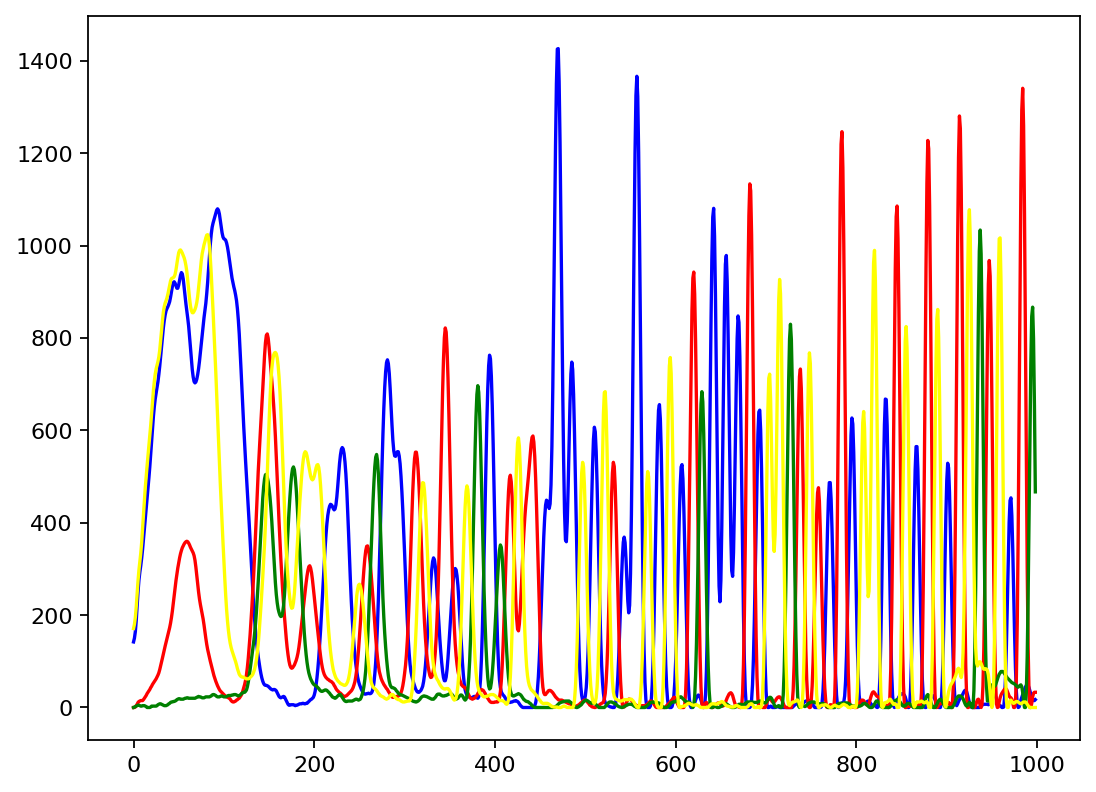

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=160)

plt.plot(trace["DATA9"][1:1000], color="blue")
plt.plot(trace["DATA10"][1:1000], color="red")
plt.plot(trace["DATA11"][1:1000], color="green")
plt.plot(trace["DATA12"][1:1000], color="yellow")
plt.show()